importing the important libraries

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("India_AQI_Bulletins_Master.csv")

# Quick view
print(df.head())
print(df.columns)

         date       City No. Stations Air Quality  Index Value  \
0  2015-05-01   Varanasi          NaN    Moderate          157   
1  2015-05-01     Kanpur          NaN    Moderate          175   
2  2015-05-01  Faridabad          NaN    Moderate          173   
3  2015-05-01  Ahmedabad          NaN    Moderate          168   
4  2015-05-01  Hyderabad          NaN    Moderate          189   

  Prominent Pollutant  
0                PM10  
1                PM10  
2                PM10  
3               PM2.5  
4               PM2.5  
Index(['date', 'City', 'No. Stations', 'Air Quality', 'Index Value',
       'Prominent Pollutant'],
      dtype='object')


C:\Users\rupes\AppData\Local\Temp\ipykernel_10604\531855097.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("India_AQI_Bulletins_Master.csv")


data cleaning

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
#coerce means write not a time instead of showing error

KeyError: 'Date'

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

KeyError: 'Date'

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


C:\Users\rupes\AppData\Local\Temp\ipykernel_10604\3159125642.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


In [6]:
print(df['date'].head())

0   2015-05-01
1   2015-05-01
2   2015-05-01
3   2015-05-01
4   2015-05-01
Name: date, dtype: datetime64[ns]


In [7]:
# Check for missing values
print(df.isnull().sum())

date                     0
City                     0
No. Stations           140
Air Quality              0
Index Value              0
Prominent Pollutant      1
dtype: int64


In [8]:
df = df.drop(columns=['No. Stations'], errors='ignore')

In [9]:
df.columns

Index(['date', 'City', 'Air Quality', 'Index Value', 'Prominent Pollutant'], dtype='object')

In [10]:
df = df.dropna()

In [11]:
df.shape

(299973, 5)

In [12]:
df.head()

,date,City,Air Quality,Index Value,Prominent Pollutant
0,2015-05-01,Varanasi,Moderate,157,PM10
1,2015-05-01,Kanpur,Moderate,175,PM10
2,2015-05-01,Faridabad,Moderate,173,PM10
3,2015-05-01,Ahmedabad,Moderate,168,PM2.5
4,2015-05-01,Hyderabad,Moderate,189,PM2.5


importing libraries


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

use Label Encoding to convert these categories of air quality into numbers.

In [14]:
# Create a label encoder object
le_quality = LabelEncoder()

# Fit and transform the 'Air Quality' column into numerical codes
df['AQI_Category_Code'] = le_quality.fit_transform(df['Air Quality'])

In [15]:
df.head()

,date,City,Air Quality,Index Value,Prominent Pollutant,AQI_Category_Code
0,2015-05-01,Varanasi,Moderate,157,PM10,1
1,2015-05-01,Kanpur,Moderate,175,PM10,1
2,2015-05-01,Faridabad,Moderate,173,PM10,1
3,2015-05-01,Ahmedabad,Moderate,168,PM2.5,1
4,2015-05-01,Hyderabad,Moderate,189,PM2.5,1


In [26]:
# Drop missing values
df = df.dropna(subset=['Index Value', 'Air Quality', 'Prominent Pollutant'])

encoding the air quality

In [27]:
# Encode Air Quality (target)
le_quality = LabelEncoder()
df['AQI_Category_Code'] = le_quality.fit_transform(df['Air Quality'])

encode prominent pollutant

In [28]:
# Encode Prominent Pollutant (feature)
le_pollutant = LabelEncoder()
df['Pollutant_Code'] = le_pollutant.fit_transform(df['Prominent Pollutant'])

In [29]:
# Extract month from date (feature)
df['Month'] = df['date'].dt.month

In [30]:
# defining X and Y values
X = df[['Index Value', 'Pollutant_Code', 'Month']]
y = df['AQI_Category_Code']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

making predictions using model

In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Predicted values:", y_pred[:10])
print("Actual values:   ", y_test[:10].values)

Predicted values: [1 3 1 4 2 1 2 1 3 1]
Actual values:    [1 3 1 4 2 1 2 1 3 1]


model evalutaion and visualisation

In [35]:
#tells the accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", round(accuracy * 100, 2), "%")

Model Accuracy:  99.9 %


printing the classification report

In [37]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_quality.classes_))

Classification Report:

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      9578
    Moderate       1.00      1.00      1.00     19105
        Poor       1.00      1.00      1.00      7018
Satisfactory       1.00      1.00      1.00     21062
      Severe       1.00      0.99      1.00       507
   Very Poor       1.00      1.00      1.00      2725
   Very poor       0.00      0.00      0.00         0

    accuracy                           1.00     59995
   macro avg       0.86      0.86      0.86     59995
weighted avg       1.00      1.00      1.00     59995



C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


visualizations and graphs

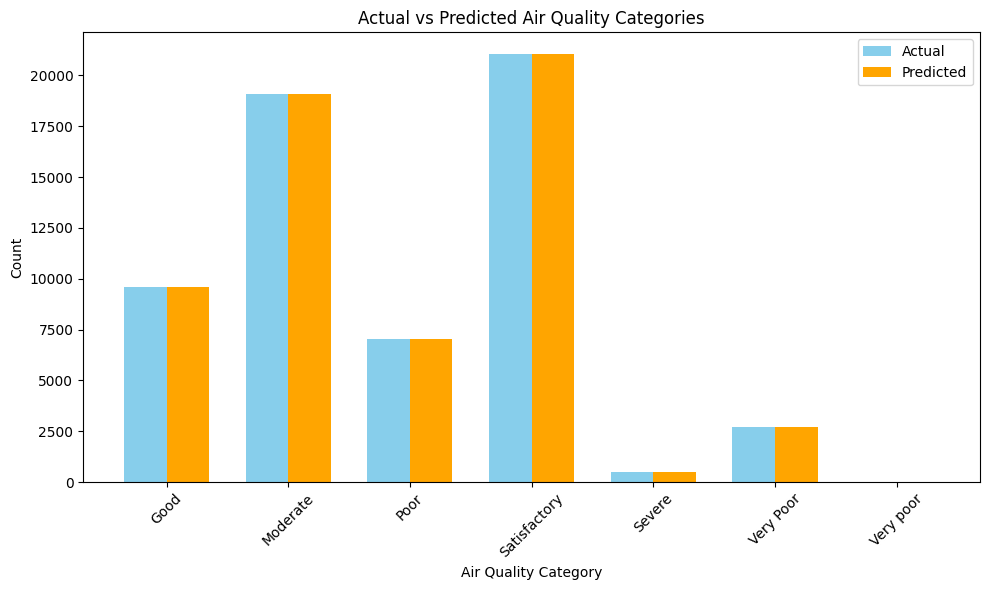

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Get class labels
labels = le_quality.classes_
all_label_indices = list(range(len(labels)))

# Ensure counts cover all labels
actual_counts = y_test_series.value_counts().reindex(all_label_indices, fill_value=0)
predicted_counts = y_pred_series.value_counts().reindex(all_label_indices, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(labels))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='skyblue')
plt.bar([i + bar_width for i in x], predicted_counts, width=bar_width, label='Predicted', color='orange')

plt.xticks([i + bar_width / 2 for i in x], labels, rotation=45)
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted Air Quality Categories')
plt.legend()
plt.tight_layout()
plt.show()


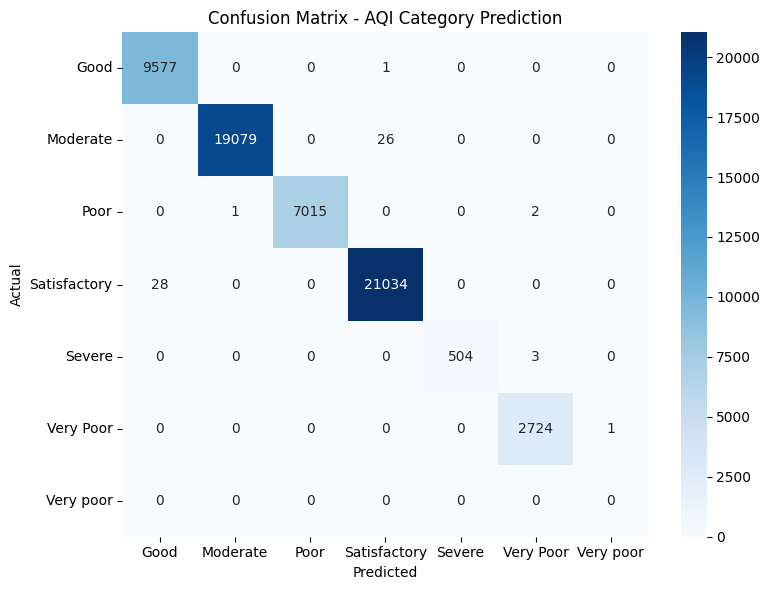

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_quality.classes_,
            yticklabels=le_quality.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AQI Category Prediction")
plt.tight_layout()
plt.show()